In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Downloads\cardio_train.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#average age 
df['age_years'] = df['age'] / 365
average_age_years = df['age_years'].mean()
print(f"Average age in years: {average_age_years:.2f}")

Average age in years: 53.34


In [8]:
# Gender counts
gender_counts = df['gender'].value_counts()
gender_counts = gender_counts.rename(index={1: 'Female', 2: 'Male'})
print(gender_counts)

Female    45530
Male      24470
Name: gender, dtype: int64


In [9]:
# Calculate BMI
df['height_m'] = df['height'] / 100
df['BMI'] = df['weight'] / (df['height_m'] ** 2)
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  years  age_years  height_m        BMI  
0     0       1       0     50  50.391781      1.68  21.967120  
1     0       1       1     55  55.419178      1.56  34.927679  
2     0       0       1     52  51.663014      1.65  23.507805  
3     0       1       1     48  48.282192      1.69  28.710479  
4     0       0       0     48  47.873973      1.56  23.011177  


In [13]:
# Calculate the percentage of individuals with cardiovascular disease
num_with_cardio = df['cardio'].sum()
total_individuals = len(df)
percentage_with_cardio = (num_with_cardio / total_individuals) * 100
print(percentage_with_cardio)

49.97


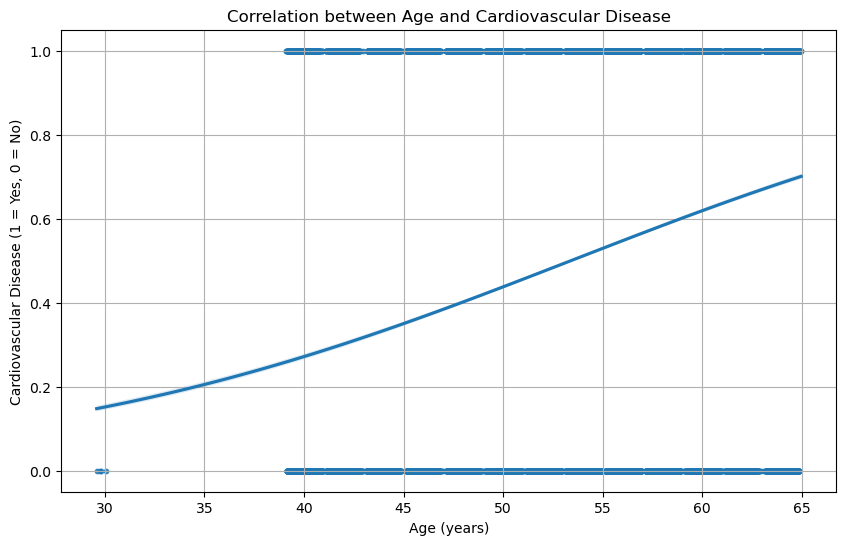

In [14]:
df['age_years'] = df['age'] / 365

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age_years', y='cardio', data=df, logistic=True, scatter_kws={'s':10})
plt.title('Correlation between Age and Cardiovascular Disease')
plt.xlabel('Age (years)')
plt.ylabel('Cardiovascular Disease (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()